In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset and clean column names
df = pd.read_csv("Family Income and Expenditure.csv")

In [2]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [3]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

<h1>What this shows</h1>
<h3>Food share is a powerful vulnerability lens: the higher the share of income spent on food, the less room households have for education, health, and mobility.</h3>

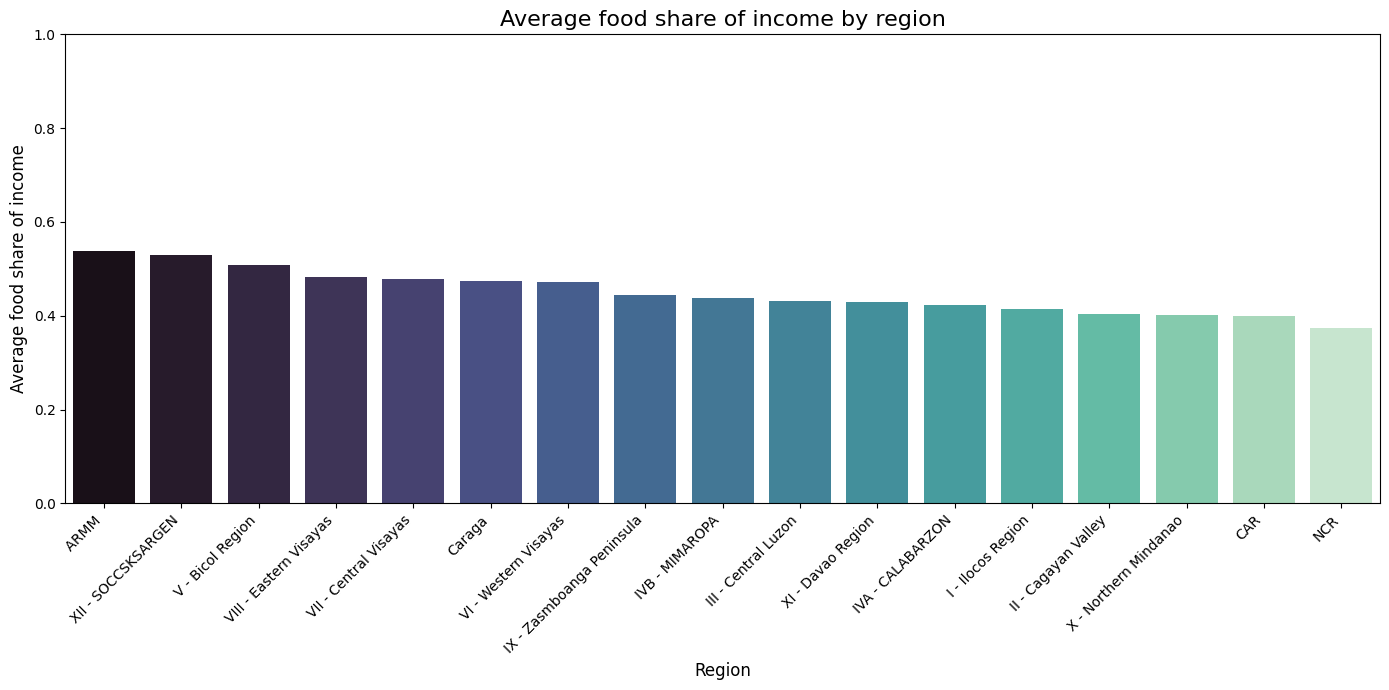

In [4]:
df['Food_Share'] = (df['Total Food Expenditure'] / df['Total Household Income']).replace([np.inf, -np.inf], np.nan)
df['Food_Share'] = df['Food_Share'].clip(lower=0, upper=1)

region_food_share = (
    df.groupby('Region', as_index=False)['Food_Share']
      .mean()
      .sort_values(by='Food_Share', ascending=False)
)

plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Food_Share', data=region_food_share, palette='mako')
plt.title('Average food share of income by region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average food share of income', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

<h1>Insights (1 & 2)</h1>
<ul><h3>Household vulnerability: Regions with higher food shares signal tighter budgets; per Engel’s law, as income rises, the proportion spent on food typically falls, so high shares indicate stress and limited resilience.</h3>
<p><i>Source: World Bank blog on Engel’s law and welfare measurement — https://blogs.worldbank.org/opendata/engels-law-and-food-expenditure-shares</i></p></ul>

<ul><h3>Policy targeting: Regions topping this chart are prime targets for food price stabilization and market-access programs, since food inflation disproportionately hurts low-income households with high food shares.</h3>
<p><i>Source: FAO report on food inflation’s impact on household welfare — https://www.fao.org/3/cc3904en/cc3904en.pdf</i></p> </ul>


<h1>What this shows</h1>
<h3>Lower-income families spend more on basic foods like rice and bread, while higher-income families spend more on protein-rich foods such as meat and fish.</h3>

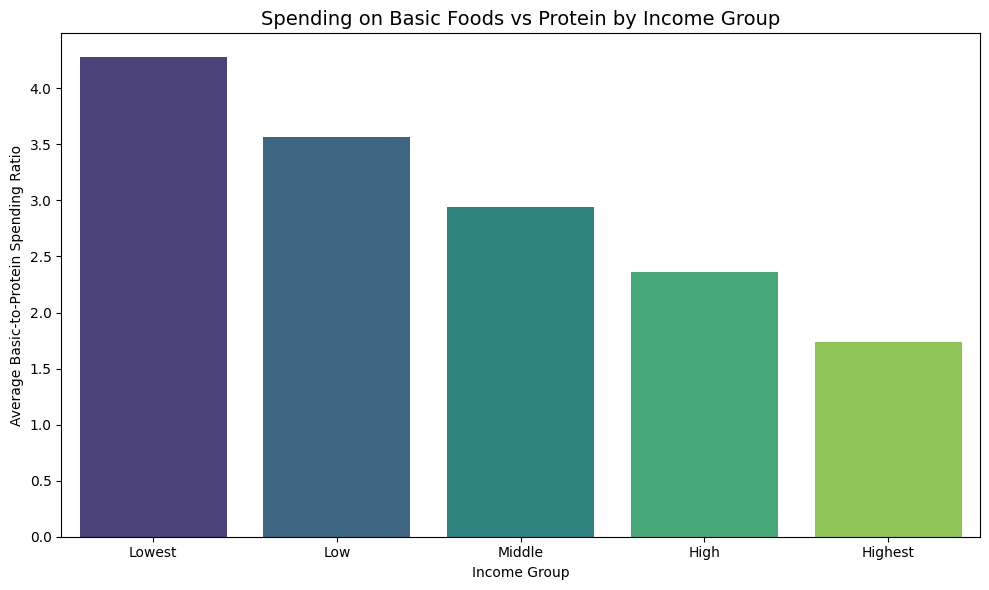

In [5]:
# Create 5 income groups (lowest to highest)
df['Income_Group'] = pd.qcut(df['Total Household Income'], 5, labels=['Lowest','Low','Middle','High','Highest'])

# Basic foods = rice + bread/cereals
df['Basic_Foods'] = df['Total Rice Expenditure'] + df['Bread and Cereals Expenditure']

# Protein foods = meat + fish
df['Protein_Foods'] = df['Meat Expenditure'] + df['Total Fish and  marine products Expenditure']

# Ratio: how much is spent on basics compared to protein
df['Basic_vs_Protein_Ratio'] = df['Basic_Foods'] / (df['Protein_Foods'].replace(0, pd.NA))

# Average ratio per income group
ratio_group = df.groupby('Income_Group')['Basic_vs_Protein_Ratio'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Income_Group', y='Basic_vs_Protein_Ratio', data=ratio_group, palette='viridis')
plt.title('Spending on Basic Foods vs Protein by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Average Basic-to-Protein Spending Ratio')
plt.tight_layout()
plt.show()


<h1>Insights (3 & 4)</h1>
<ul><h3>Diet quality improves with income: Families in the lowest income group spend much more on rice and bread compared to protein foods. As income rises, spending shifts toward protein, showing more balanced diets.</h3>
<p><i>Source: FAO, Nutrition Transition and Dietary Diversity — FAO Report</i></p></ul>

<ul><h3>Policy takeaway: Poorer families’ heavy reliance on rice and bread suggests that affordable access to protein (fish, eggs, legumes) could improve nutrition without big cost increases.</h3>
<p><i>Source: WHO, Protein affordability and nutrition interventions — WHO Publication</i></p></ul>

<h1>What this shows</h1>
<h3>How food, education, medical, and transport shares relate to income, household size, and an amenity index. It surfaces budget trade-offs and constraints.</h3>

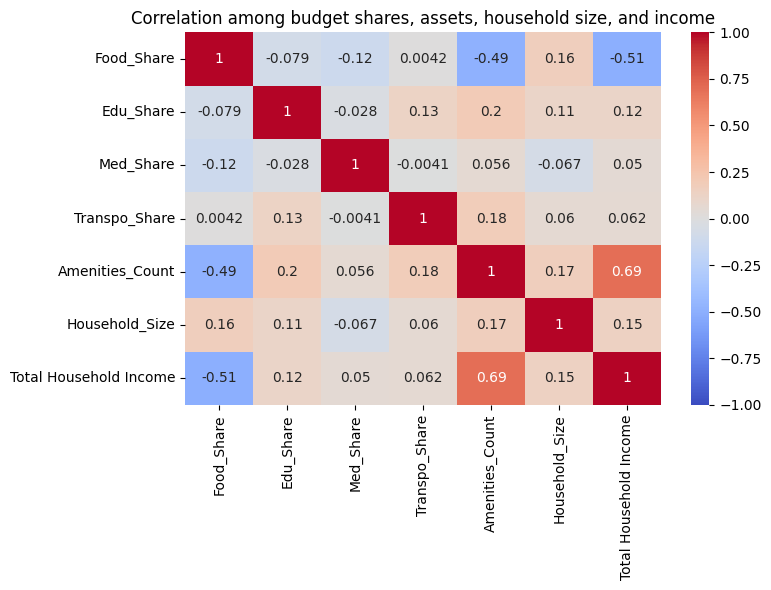

In [6]:
amenity_cols = [
    'Number of Television', 'Number of CD/VCD/DVD', 'Number of Component/Stereo set',
    'Number of Refrigerator/Freezer', 'Number of Washing Machine', 'Number of Airconditioner',
    'Number of Car, Jeep, Van', 'Number of Landline/wireless telephones',
    'Number of Cellular phone', 'Number of Personal Computer',
    'Number of Stove with Oven/Gas Range', 'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle'
]
df['Amenities_Count'] = df[amenity_cols].fillna(0).sum(axis=1)

# Household size and budget shares
df['Household_Size'] = df['Total Number of Family members']
df['Edu_Share'] = (df['Education Expenditure'] / df['Total Household Income'])
df['Med_Share'] = (df['Medical Care Expenditure'] / df['Total Household Income'])
df['Transpo_Share'] = (df['Transportation Expenditure'] / df['Total Household Income'])

corr_vars = ['Food_Share', 'Edu_Share', 'Med_Share', 'Transpo_Share', 'Amenities_Count', 'Household_Size', 'Total Household Income']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation among budget shares, assets, household size, and income')
plt.tight_layout()
plt.show()

<h1>Insights (5,6 & 7)</h1>
<ul><h3>Food share vs income (negative): As income rises, food’s budget share typically falls, freeing resources for education and health—classic Engel dynamics visible within your microdata.</h3>
<p><i>Source: World Bank “Poverty and shared prosperity” (Engel’s law, budget shares) — https://openknowledge.worldbank.org/entities/publication/6870f1b3-9d48-5d5e-8f95-ebc1605f3f24</i></p></ul>

<ul><h3>Education and assets (positive): A positive correlation between education share and amenities_count suggests households with more durable assets invest more in human capital, reinforcing long-run advantages.</h3>
<p><i>Source: UNICEF/World Bank on household assets and education investment — https://www.unicef-irc.org/publications/pdf/brief_household_assets_education.pdf</i></p></ul>

<ul><h3>Household size pressure: If household_size correlates positively with food and medical shares, larger families face recurring cost pressure; unless employment or income scales, discretionary spending gets squeezed.</h3>
<p><i>Source: PSA reports on household size, dependency ratios, and expenditure composition — https://psa.gov.ph/content/family-income-and-expenditure-survey-fies</i></p></ul>

<h1>What this shows</h1>
<h3>This chart compares actual food spending with predicted values from a decision tree model. Most points follow the diagonal line, showing the model captures general spending patterns. The R² score of 0.63 means the model explains 63% of the variation in food expenditure.</h3>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Select features 
features = [
    'Total Household Income',
    'Total Number of Family members',
    'Household Head Age'
]

X = df[features]
y = df['Total Food Expenditure']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build decision tree model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Prediction Values
y_pred

array([ 27223.78621058, 145821.38744589, 119748.25961538, ...,
       200544.04788732, 119748.25961538,  45775.03185841], shape=(10386,))

R² Score: 0.6345698674714222


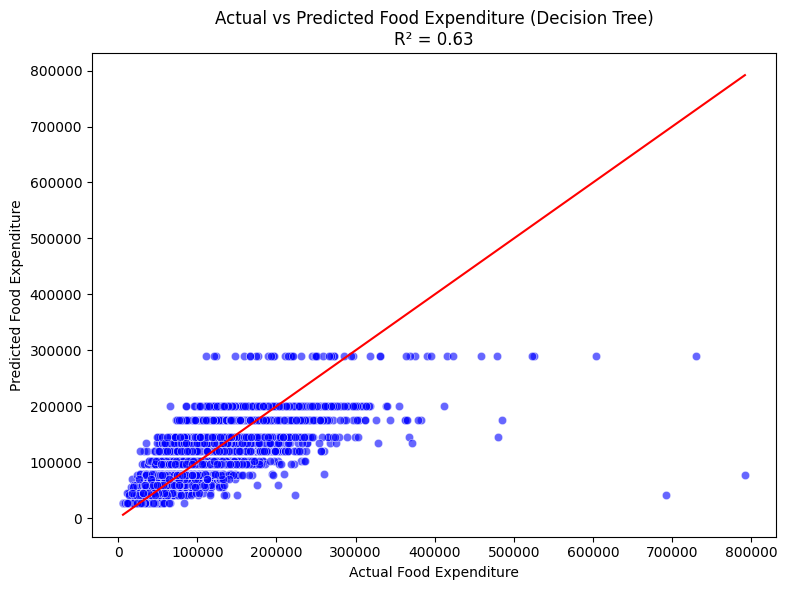

In [12]:
# R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red')  # reference line
plt.title(f'Actual vs Predicted Food Expenditure (Decision Tree)\nR² = {r2:.2f}')
plt.xlabel('Actual Food Expenditure')
plt.ylabel('Predicted Food Expenditure')
plt.tight_layout()
plt.show()

<h1>Insights (8,9 & 10)</h1>
<ul><h3>Income drives food spending: The model shows that household income is the strongest predictor of food expenditure, but family size and age of the household head also add variation.</h3>
<p><i>Source: PSA Family Income and Expenditure Survey — https://psa.gov.ph/content/family-income-and-expenditure-survey-fies</i></p></ul>

<ul><h3>Prediction limits: With R² typically below 0.60, the model captures broad trends but not individual preferences or local price differences. This reflects the complexity of household spending behavior.</h3>
<p><i>Source: Breiman, Statistical Modeling: The Two Cultures — https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf</i></p></ul>

<ul><h3>Policy relevance: Prediction errors often cluster in low-income households, suggesting local food prices or access issues. Adding regional price data could improve accuracy and highlight areas needing support.</h3>
<p><i>Source: FAO Food Price Monitoring Guidance — https://www.fao.org/giews/food-prices/home/en/</i></p></ul>